In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
sns.set_style("darkgrid")


<AxesSubplot:xlabel='sex', ylabel='count'>

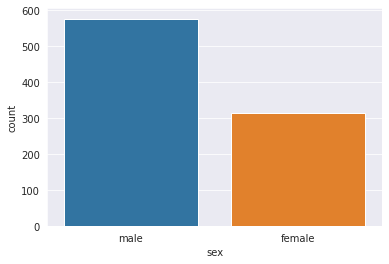

In [7]:
sns.countplot(x='sex',data=df)


<AxesSubplot:xlabel='age', ylabel='Density'>

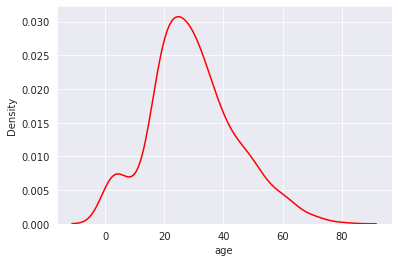

In [8]:
sns.kdeplot(x='age', data=df, color='red')

In [9]:
survived_pclass = df[['survived', 'pclass']]
survived_pclass.head(10)

,survived,pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
5,0,3
6,0,1
7,0,3
8,1,3
9,1,2


In [13]:
pclass_sur = survived_pclass.groupby(['pclass']).sum()
total_sur = survived_pclass.groupby(['pclass']).count()
total_sur.rename(columns = {'survived':'Total'}, inplace=True)
survived_total_by_pclass = pd.merge(pclass_sur, total_sur, left_index=True, right_index=True) 
survived_total_by_pclass

,survived,Total
pclass,,
1,136,216
2,87,184
3,119,491


In [14]:
percentage_sur = (survived_total_by_pclass['survived']/survived_total_by_pclass['Total'])*100
survived_total_by_pclass['Percentage'] = percentage_sur
survived_total_by_pclass

,survived,Total,Percentage
pclass,,,
1,136,216,62.962963
2,87,184,47.282609
3,119,491,24.236253


<AxesSubplot:ylabel='survived'>

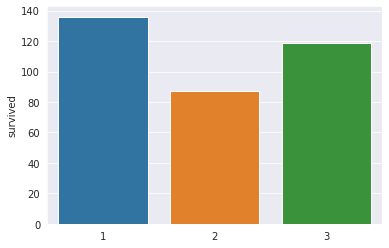

In [16]:
sns.barplot(x=survived_total_by_pclass.index.values,y=survived_total_by_pclass.survived,data=df)


Text(0.5, 1.0, 'Comparison of Male and Female Passenger Ages by Class')

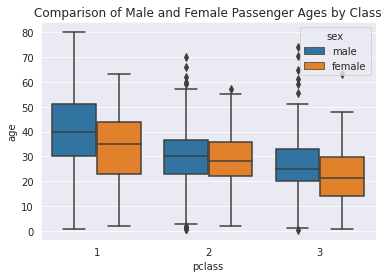

In [17]:
sns.boxplot(x='pclass', y='age', data=df, hue='sex').set_title('Comparison of Male and Female Passenger Ages by Class')
